# **<div align="center">Cryptography Project (CS352)</div>**
 ## <div align="center">Classification of various Fake News Articles</div>
# **Name: Dheeraj Chaudhary**
# **Roll: 17BCS009**
###  <span style="color:blue">I have taken a dataset which contains thousands of Fake news kept in rows, with various relevent columns, which we'll see later in the Analysis. </span>
## Description of Dataset
>> The dataset contains various articles of fake News. This dataset was collected from realworld
sources; The fake news articles were collected from different sources like, from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contains different types of articles on different topics, however, the majority of articles focus on political and World news topics.

>> **PS**: The dataset contains Four columns, First is **title** which have titles of the article, second is **text** which have content/story of the article, Third is **subject**, to what category the article belong and the last column is **date** of posting of the article.

> **Name:** ISOT Fake News Dataset                       

> **Provider:** External Data Source

> **Host:** University of Victoria

### Using this dataset, I'll apply various **Machine Learning models** to get the best possible one, which can classify the fake news articles into various categories like, whether it belongs to *Political news* or *government news* etc. 


| First Header  | Second Header |
| ------------- | ------------- |
| Content Cell  | Content Cell  |
| Content Cell  | Content Cell  |

## Let's Analyse the dataset

In [ ]:
## importing the reuqired libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

## Load the dataset and print starting rows, along with describe the dataset in the next cell

In [56]:
df = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/Cryptography/Project/Fake.csv')
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [57]:
df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


## Printing all the unique category present in the dataset
> ### we can see all the 6 categories and number of articles belong to each corresponding category 

In [58]:
category = df['subject'].value_counts()
category
# plt.plot(category)

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

## Plotting Bar graph for categories of news articles

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


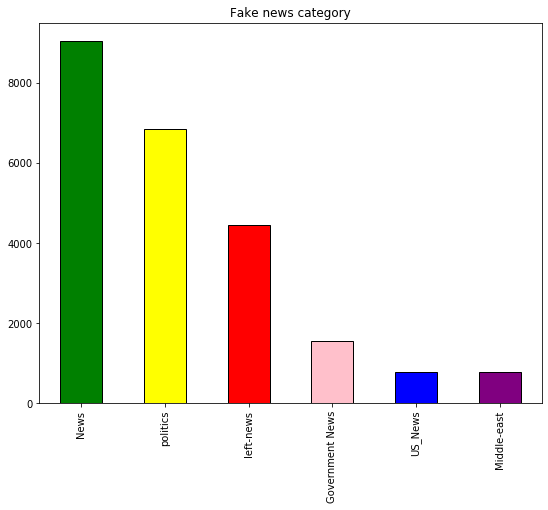

In [59]:

colors = ['green', 'yellow', 'red', 'pink', 'blue', 'purple' ]
df['subject'].value_counts().plot(kind='bar',figsize=(9, 7),edgecolor='k',title="Fake news category", colors = colors)
# plt.savefig('Sentiment_bar_plot.png', dpi=100)

In [60]:
# Drop rows which contain any null value (or NaN)
df = df.dropna()
df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [61]:
category = df['subject'].value_counts()
category
# plt.plot(category)

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

## Since, we can see number of articles belongs to US_News and Middle-east  are very less comapred to other category. So, we need to discard it from our dataset.
>  To do this, we'll make a new column in the datset as, label. And assign all those articles a unique number which are not belong to US_News and Middle-east. So finally we'll see, in the label column that all corresponding value of these two discarded category will be *NA*.

In [62]:
df["label"] = df['subject'].map({'News':0,
'politics' : 1,
'left-news': 2,
'Government News' : 3})

## Here finally we'll take the column which are required for our Machine Learning model.
> ### Taking the article **text** column which contains story of the Fake news and label column which we just have added in the dataset.

>> We'll also drop all those rows which have *NA* value in the label column, which refers that we are removing article belongs to US_News and Middle-east news category.

In [64]:
model_data = pd.DataFrame()
model_data['text'] = df['text']
model_data['label'] = df['label']
model_data = model_data.dropna()
model_data['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21915    Don t you just love an entitled IRS lawyer who...
21916    This is a sad commentary on a generation who h...
21917    Yeah that whole  taking up arms  thing seems t...
21918    In case you missed it Sen. Harry Reid (R-NV), ...
21919    The irony here isn t lost on us. Hillary is be...
Name: text, Length: 21920, dtype: object

## Some preprocessing in the *text* column so that it helps our model to understand the category of the news.

In [65]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer()
text_counts= cv.fit_transform(model_data['text'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, model_data['label'], test_size=0.30, shuffle=True, random_state=101)

In [67]:
multinomial_model = MultinomialNB().fit(X_train, y_train)
multinomial_model_predicted= multinomial_model.predict(X_test)


In [68]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, multinomial_model_predicted))

MultinomialNB Accuracy: 0.5501824817518248


In [69]:
print("confusion_matrix",confusion_matrix(y_test,multinomial_model_predicted))

confusion_matrix [[2584   51  117   13]
 [ 602  702  629  107]
 [ 218  737  264   67]
 [  85  251   81   68]]


In [70]:
print("classification_report")
print(classification_report(y_test,multinomial_model_predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83      2765
         1.0       0.40      0.34      0.37      2040
         2.0       0.24      0.21      0.22      1286
         3.0       0.27      0.14      0.18       485

    accuracy                           0.55      6576
   macro avg       0.41      0.41      0.40      6576
weighted avg       0.50      0.55      0.52      6576



In [71]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [72]:
xgb_model_predicted = xgb_model.predict(X_test)

In [73]:
print("XGB Classification Accuracy: ",metrics.accuracy_score(y_test, xgb_model_predicted))

XGB Classification Accuracy:  0.6205900243309003


In [74]:
print("confusion_matrix",confusion_matrix(y_test,xgb_model_predicted))

confusion_matrix [[2728   29    8    0]
 [  13 1183  704  140]
 [  10 1083  143   50]
 [   1  386   71   27]]


In [75]:
print("classification_report")
print(classification_report(y_test,xgb_model_predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2765
         1.0       0.44      0.58      0.50      2040
         2.0       0.15      0.11      0.13      1286
         3.0       0.12      0.06      0.08       485

    accuracy                           0.62      6576
   macro avg       0.43      0.43      0.42      6576
weighted avg       0.59      0.62      0.60      6576



In [76]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
logistic_model_predicted = logistic_model.predict(X_test)

In [78]:
print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test, logistic_model_predicted))

Logistic Regression Accuracy:  0.6356447688564477


In [79]:
print("confusion_matrix",confusion_matrix(y_test,logistic_model_predicted))


confusion_matrix [[2712   30   19    4]
 [  20 1213  674  133]
 [  14 1008  203   61]
 [   5  346   82   52]]


In [80]:
print("classification_report")
print(classification_report(y_test,logistic_model_predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2765
         1.0       0.47      0.59      0.52      2040
         2.0       0.21      0.16      0.18      1286
         3.0       0.21      0.11      0.14       485

    accuracy                           0.64      6576
   macro avg       0.47      0.46      0.46      6576
weighted avg       0.62      0.64      0.62      6576



In [48]:
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
gradient_model_predicted = gradient_model.predict(X_test)

In [50]:
print("Gradient Boosting classification Accuracy: ",metrics.accuracy_score(y_test, gradient_model_predicted))

Gradient Boosting classification Accuracy:  0.6970802919708029


In [51]:
print("confusion_matrix",confusion_matrix(y_test,gradient_model_predicted))

confusion_matrix [[2727   34    4    0]
 [  35 1682  292   31]
 [  26 1087  157   16]
 [   4  423   40   18]]


In [52]:
print("classification_report")
print(classification_report(y_test,gradient_model_predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2765
         1.0       0.52      0.82      0.64      2040
         2.0       0.32      0.12      0.18      1286
         3.0       0.28      0.04      0.07       485

    accuracy                           0.70      6576
   macro avg       0.52      0.49      0.47      6576
weighted avg       0.66      0.70      0.65      6576



In [81]:
from sklearn.linear_model import SGDClassifier

In [82]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_modelpredicted = model4.predict(X_test)
print("Stochastic Gradient Descent: ",metrics.accuracy_score(y_test, sgd_modelpredicted))

Stochastic Gradient Descent:  0.6970802919708029


In [83]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_modelpredicted = svm_model.predict(X_test)
print("Support Vecto Machine: ",metrics.accuracy_score(y_test, svm_modelpredicted))

Support Vecto Machine:  0.6972323600973236


###### 

In [84]:
print("classification_report")
print(classification_report(y_test,svm_modelpredicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2765
         1.0       0.51      0.90      0.66      2040
         2.0       0.20      0.04      0.06      1286
         3.0       0.08      0.00      0.00       485

    accuracy                           0.70      6576
   macro avg       0.44      0.48      0.42      6576
weighted avg       0.62      0.70      0.63      6576



To cite this dataset use:
1. Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text
classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley,
January/February 2018.
2. Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram
Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds)
Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments.
ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-
138